### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and Exploring the dataset

In [3]:
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,1587,45,13,0,0,0,0,0,0,0
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,1587,27,19,0,0,0,0,0,0,0
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,1587,4,11,0,0,0,0,0,0,0
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,872,16,10,0,0,0,0,0,0,0
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,872,27,12,0,0,0,0,0,0,0


In [4]:
df.shape

(14268928, 29)

In [2]:
#setting color map for visualisations
my_cmap = sns.color_palette("YlGnBu")

### When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [5]:
#A seperate dataframe with only the necessary columns for the question

q1 = df.loc[:, ['Year', 'Month', 'DayofMonth', 'DayOfWeek','DepTime','ArrDelay']]
q1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay
0,2006,1,11,3,743.0,6.0
1,2006,1,11,3,1053.0,-5.0
2,2006,1,11,3,1915.0,-23.0
3,2006,1,11,3,1753.0,-8.0
4,2006,1,11,3,824.0,0.0


In [6]:
#arrival delays will be used in the all delay analyses
#only planes with a delay more than 0 mins will be considered as a delayed plane

q1 = q1[q1["ArrDelay"]>0]

What is the best time of day?

In [7]:
#Creating timeframes according to the departure time

q1["Timeframe"] = q1["DepTime"].apply(lambda x: 
                                     "12am - 6am" if x<600 else (
                                     "6am - 12pm" if x>=600 and x<1200 else(
                                     "12pm - 6pm" if x>=1200 and x<1800 else(
                                     "6pm - 12am" if x>=1800 and x<=2359))))

q1.groupby(["Timeframe"])["ArrDelay"].mean().sort_values()

Timeframe
6am - 12pm    20.181754
12pm - 6pm    30.184636
6pm - 12am    44.944905
12am - 6am    51.259843
Name: ArrDelay, dtype: float64

In [ ]:
#The timeframe between 6am - 12noon is the best time to fly

In [ ]:
# Pie Plot
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

ax.pie(q1.groupby("Timeframe")["ArrDelay"].mean(),
         labels = ["12am-6am","12pm-6pm", "6am-12pm", "6pm-12am"],
         autopct='%1.2f%%',
         colors= my_cmap,
         textprops={'fontsize': 15})

ax.set_title("Delays in different Timeframes",
                size = 18)

plt.savefig("Delays in different timeframes.png")
plt.show()

What is the best day of the week

In [13]:
q1.groupby(["DayOfWeek"])["ArrDelay"].mean().sort_values()
#Saturday is the best day to fly

DayOfWeek
6    28.150387
2    29.537804
3    30.972443
7    31.391195
1    31.549142
5    33.140775
4    33.392793
Name: ArrDelay, dtype: float64

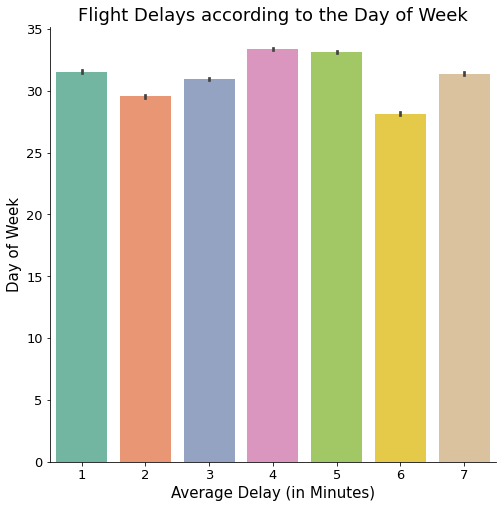

In [15]:
# Bar Plot to show delayed flights according to Day of Week
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.barplot(x= "DayOfWeek", y = "ArrDelay", data = q1, 
           palette = my_cmap)

ax.set_ylabel("Day of Week",
               size = 15)

ax.set_xlabel('Average Delay (in Minutes)',
                 size = 15)

ax.set_title("Flight Delays according to the Day of Week",
                size = 18)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Delayed Flights according to Day.png")
plt.show()


What is the best time of the year to fly

In [16]:
#Analysing the time of the year season wise. 
q1["TimeofYear"] = q1["Month"].apply(lambda x: 
                                     "Spring" if x>=3 and x<=5 else (
                                     "Summer" if x>=6 and x<=8 else(
                                     "Fall" if x>=9 and x<=11 else "Winter")))

q1.groupby(["TimeofYear"])["ArrDelay"].mean().sort_values()
#Fall is the best season to minimise delays

TimeofYear
Fall      28.866053
Spring    29.275795
Winter    32.221277
Summer    34.495267
Name: ArrDelay, dtype: float64

In [17]:
q1.groupby(["Month"])["ArrDelay"].mean().sort_values()
#November is the best month to fly

Month
11    28.054863
5     28.175849
9     28.791311
4     28.872843
1     29.537914
10    29.646670
3     30.682532
2     31.640476
8     32.693271
7     34.881240
12    34.953670
6     35.851371
Name: ArrDelay, dtype: float64

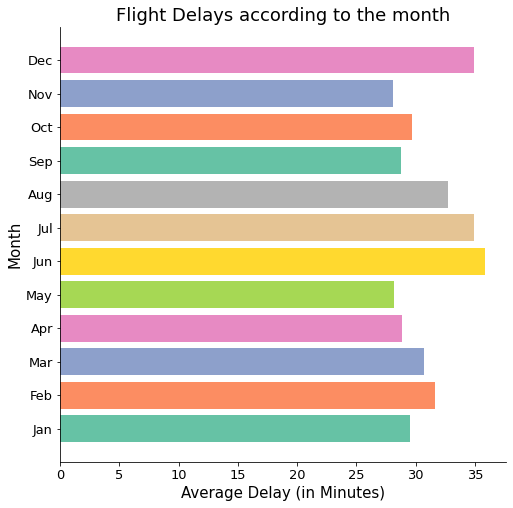

In [21]:
# Bar Plot to show delayed flights according to months
fig, ax = plt.subplots(1, 1, figsize = (8, 8))


ax.barh(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],  
          q1.groupby(["Month"])["ArrDelay"].mean(), 
          color = my_cmap)

ax.set_ylabel('Month',
               size = 15)

ax.set_xlabel('Average Delay (in Minutes)',
                 size = 15)

ax.set_title("Flight Delays according to the month",
                size = 18)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Delayed Flights according to Month.png")
plt.show()
